In [2]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [3]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0          
x = numpy.linspace(x_start, x_end, N)   
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y) 

In [9]:
def vor(strength, xv, yv, X, Y):
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [17]:
gamma, xv, yv =10.0, 0.0, 0.0

u_vor, v_vor = vor(gamma, xv, yv, X, Y)


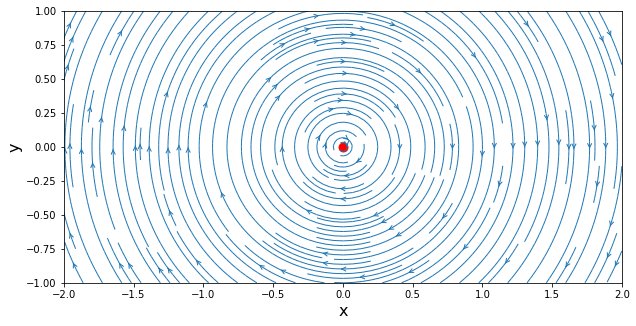

In [18]:
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vor, v_vor,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(xv, yv, color='r', s=80, marker='o');

In [20]:
def vel_sink(strength, xs, ys, X, Y):
    
    u = strength / (2 * math.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * math.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [22]:
strength, x_sink, y_sink = -5.0, 0.0, 0.0

u_sink, v_sink = vel_sink(strength, x_sink, y_sink, X, Y)


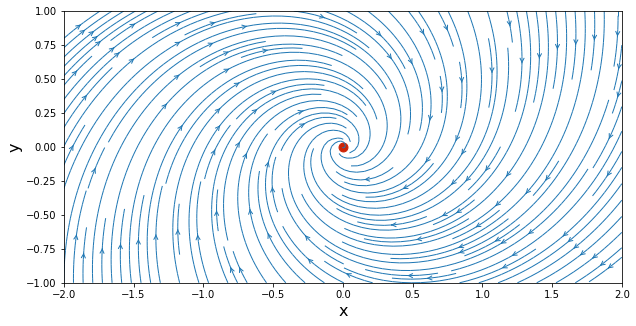

In [25]:
u = u_vor + u_sink
v = v_vor + v_sink

width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(xv, yv, color='#CD2305', s=80, marker='o');